We have seen two most common linear classification algorithms are
 **logistic regression**, implemented in linear_model.LogisticRegression, and 
 **linear support vector machines** (linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classifier).
  Despite its name, **LogisticRegression is a classification algorithm and not a regression algorithm**, and it should not be confused with LinearRegression.

KSVM stands for "Kernel Support Vector Machine." It's an extension of the traditional Support Vector Machine (SVM) that allows for non-linear decision boundaries by using a technique called the kernel trick.

*Key Points about Kernel Support Vector Machine (KSVM):*

1. *Non-Linearity:*
   - While the traditional SVM is effective for linearly separable data, KSVM extends its capability to handle non-linearly separable data.

2. *Kernel Trick:*
   - KSVM introduces the kernel trick, a method to implicitly transform the input space into a higher-dimensional space.
   - This transformation allows for capturing complex relationships and non-linear patterns in the data.

3. *Types of Kernels:*
   - Commonly used kernels include polynomial, radial basis function (RBF), and sigmoid.
   - Each kernel type introduces a different way of mapping data into a higher-dimensional space.

4. *Purpose:*
   - The purpose of using KSVM is to handle datasets where a simple linear separation is not sufficient.
   - It's particularly useful when the decision boundary needs to be more flexible and adapt to complex patterns.

In summary, KSVM enhances the capabilities of SVM by allowing it to work well with non-linear data through the kernel trick. It's valuable in scenarios where a linear decision boundary is not effective. 


======================================================================================================

Kernel Support Vector Machines (KSVM) can be applied to both classification and regression tasks. Here's a brief overview of how they work in each scenario:

1. *Classification:*
   - KSVM is commonly used for classification tasks, where the goal is to assign data points to different categories or classes.
   - It's particularly useful when the relationship between features and classes is non-linear.

2. *Regression:*
   - KSVM can also be adapted for regression tasks, where the goal is to predict a continuous outcome rather than categorizing into classes.
   - In regression, KSVM aims to capture non-linear relationships between input features and the target variable.

In both cases, the kernel trick allows KSVM to handle complex patterns and relationships in the data, making it versatile for various machine learning tasks. Whether you're dealing with classification or regression, KSVM provides a flexible framework to model non-linear dependencies.

Let’s look at the synthetic dataset we used

Text(0, 0.5, 'Feature 1')

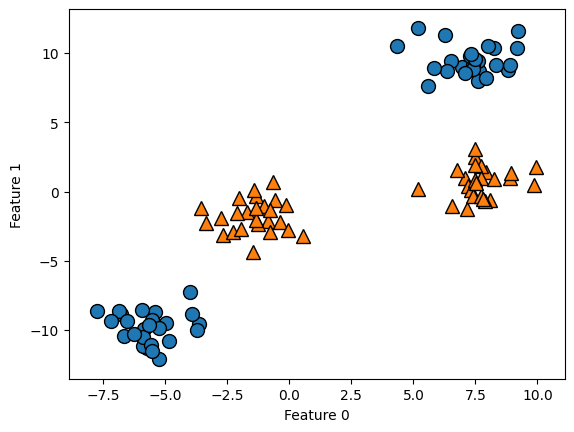

In [5]:
import warnings 
warnings.filterwarnings("ignore")
import mglearn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


### Let's use Linear Classifier technique to separate this

Text(0, 0.5, 'Feature 1')

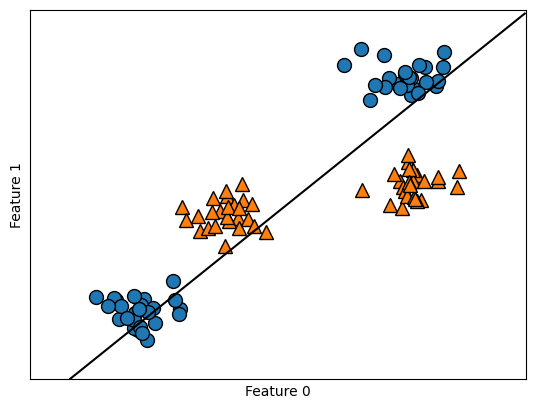

In [6]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")



A linear model for classification can only separate points using a line, and will not be
able to do a very good job on this dataset

Now let’s expand the set of input features, say by also **adding feature1 ** 2**, the
square of the second feature, as a new feature. Instead of representing each data point
as a two-dimensional point, (feature0, feature1), 

we now represent it as a **three dimensional point, (feature0, feature1, feature1 ** 2).**
10 This new representation is illustrated in Figure 2-38 in a three-dimensional scatter plot:


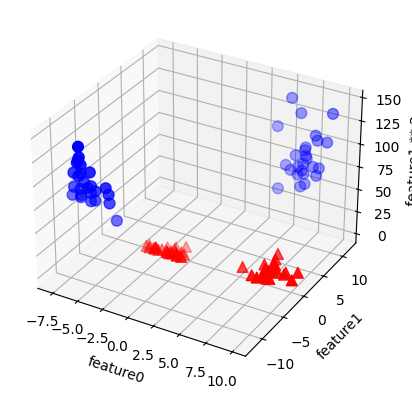

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D

# Create synthetic data
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

# Add a squared feature
X_new = np.hstack([X, X[:, 1:] ** 2])

# Create a 3D scatter plot
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')

# Plot points with y == 0 in blue and y == 1 in red
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)

# Set labels for the axes
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

# Show the plot
plt.show()


In the new representation of the data, it is now indeed possible to separate the two
classes using a linear model, a plane in three dimensions. We can confirm this by fit‐
ting a linear model to the augmented data 

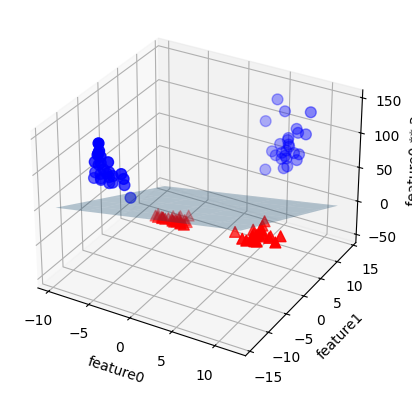

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
from mpl_toolkits.mplot3d import Axes3D

# Create synthetic data
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

# Add a squared feature
X_new = np.hstack([X, X[:, 1:] ** 2])

# Train a linear SVM
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# Create a 3D scatter plot
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')

# Plot the decision boundary surface
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

# Plot points with y == 0 in blue and y == 1 in red
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)

# Set labels for the axes
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")

# Show the plot
plt.show()


As a function of the original features, the linear SVM model is not actually linear any‐
more. It is not a line, but more of an ellipse, as you can see from the plot created here

Text(0, 0.5, 'Feature 1')

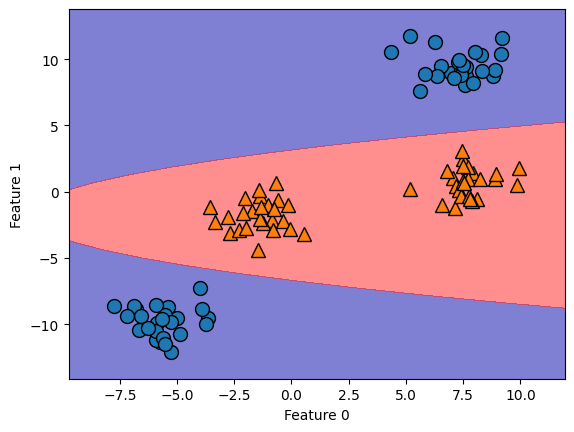

In [16]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
 cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## The kernel trick

**The lesson here is that adding nonlinear features to the representation of our data can make linear models much more powerful.**

However, often we don’t know which fea‐
tures to add, and adding many features (like all possible interactions in a 100-
dimensional feature space) might make computation **very expensive.** more dimension means more computational power needed

Luckily, there is
a clever mathematical trick that allows us to learn a classifier in a higher-dimensional
space without actually computing the new, possibly very large representation. **This is known as the kernel trick, and it works by directly computing the distance (more precisely, the scalar products) of the data points for the expanded feature representation,without ever actually computing the expansion**

The Kernel Trick in machine learning, especially in Kernel Support Vector Machines (KSVM), allows for implicit transformation of data into a higher-dimensional space. **By employing kernel functions like Polynomial, RBF, or Sigmoid, complex non-linear relationships are captured without explicitly adding dimensions.** This trick enhances the algorithm's ability to find optimal decision boundaries in transformed spaces, making it a powerful tool for handling non-linearly separable data.

There are two ways to map your data into a higher-dimensional space that are com‐
monly used with support vector machines

#### polynomial kernel

Which computes all
possible polynomials up to a certain degree of the original features (like feature1 **
2 * feature2 ** 5)

#### radial basis function (RBF) kernel

Also known as the Gaussian kernel. The Gaussian kernel is a bit harder to explain, as it corresponds to an **infinite-dimensional feature space**. One way to explain the Gaussian kernel is that it considers all possible polynomials of all degrees, but the importance of the features decreases for higher degrees

## Understanding SVMs

During training, the SVM learns how important each of the training data points is to
represent the decision boundary between the two classes. Typically **only a subset of the training points matter for defining the decision boundary**:

***The ones that lie on the border between the classes. These are called support vectors and give the support vector machine its name***

During training, the SVM learns how important each of the training data points is to
represent the decision boundary between the two classes. Typically only a subset of
the training points matter for defining the decision boundary: the ones that lie on the
border between the classes. These are called support vectors and give the support vec‐
tor machine its name.
To make a prediction for a new point, the distance to each of the support vectors is
measured. A classification decision is made based on the distances to the support vec‐
tor, and the importance of the support vectors that was learned during training
(stored in the dual_coef_ attribute of SVC).
The distance between data points is measured by the

 Gaussian kernel:  krbf(x1 , x2) = exp (ɣǁx1  - x2ǁ^2)

Here, x1  and x2 are data points, ǁ x1  - x2 ǁ denotes Euclidean distance, and ɣ (gamma)
is a parameter that controls the width of the Gaussian kernel

===================================================================================

Below shows the result of training a support vector machine on a twodimensional two-class dataset. The decision boundary is shown in black, and the sup‐
port vectors are larger points with the wide outline. The following code creates this
plot by training an SVM on the forge dataset:


Text(0, 0.5, 'Feature 1')

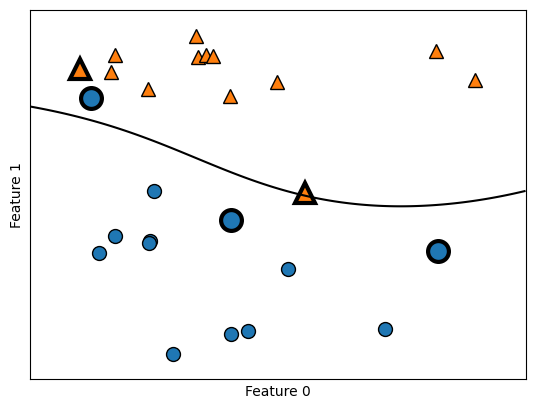

In [17]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In this case, the SVM yields a very smooth and nonlinear (not a straight line) bound‐
ary. We adjusted two parameters here: 
1. the C parameter and 
2. the gamma parameter,

which we will now discuss in detail.

### Tuning SVM parameters


*Gamma Parameter*

The gamma parameter is the one shown in the formula given in the previous section,
which controls the width of the Gaussian kernel. It determines the scale of what it
means for points to be close together.

*The C parameter*

It is a regularization parameter, similar to that used in the linear models. It limits the importance of each point (or
more precisely, their dual_coef_)

Let’s have a look at what happens when we vary these parameters

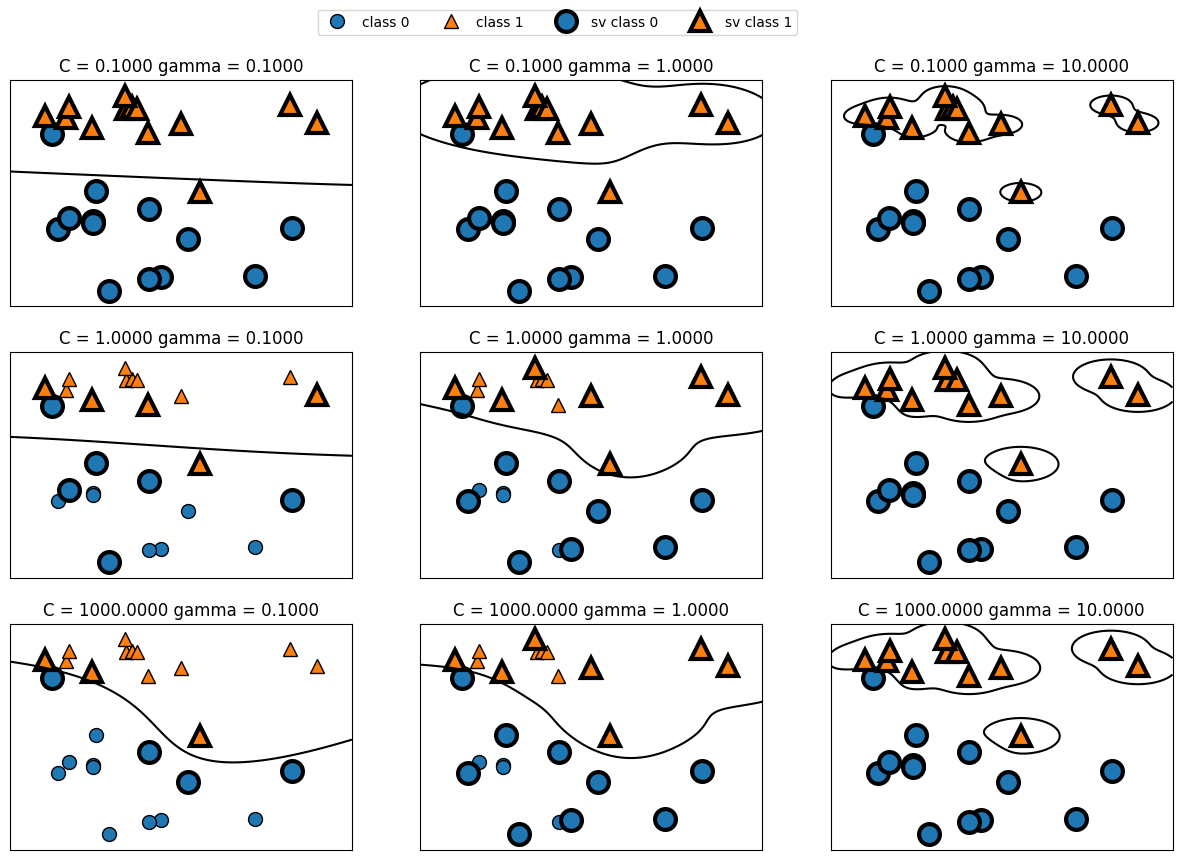

In [20]:
import mglearn
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
 for a, gamma in zip(ax, range(-1, 2)):
  mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
 ncol=4, loc=(.9, 1.2))

### Varying Gamma Parameter

Going from left to right, we increase the value of the parameter gamma from 0.1 to 10.

**A small gamma means a large radius for the Gaussian kernel, which means that many points are considered close by. This is reflected in very smooth decision boundaries on the left, and boundaries that focus more on single points further to the right.**

A low value of gamma means that the decision boundary will vary slowly, which yields a model of low complexity, while a high value of gamma yields a more complex model

### Varying C Parameter

Going from top to bottom, we increase the C parameter from 0.1 to 1000. As with the
linear models,

**A small C means a very restricted model, where each data point can only have very limited influence.**
You can see that at the top left the decision boundary looks nearly linear, with the misclassified points barely having any influence on the line. 

**Increasing C, as shown on the bottom right, allows these points to have a stronger influence on the model and makes the decision boundary bend to correctly classify them.**


##### Let’s apply the RBF kernel SVM to the Breast Cancer dataset. By default, C=1 and gamma=1/n_features:

In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


The model overfits quite substantially, with a perfect score on the training set and
only 63% accuracy on the test set. While SVMs often perform quite well,
**they are very sensitive to the settings of the parameters and to the scaling of the data.**
In particular, they require all the features to vary on a similar scale

Let’s look at the mini‐
mum and maximum values for each feature, plotted in log-space

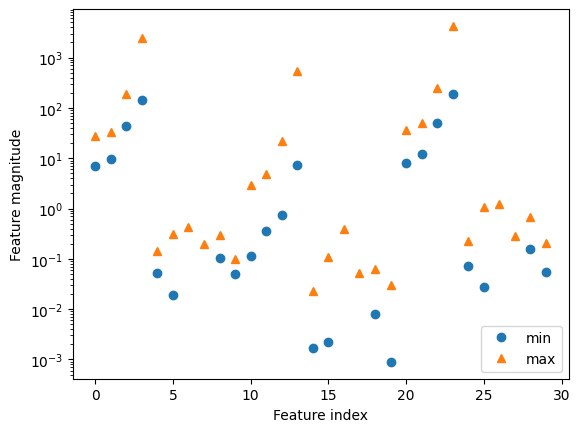

In [42]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

### Preprocessing data for SVMs

One way to resolve this problem is by rescaling each feature so that they are all
approximately on the same scale. A common rescaling method for **kernel SVMs** is to
scale the data such that all features are between 0 and 1. 

In [43]:
# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)
# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [44]:
# use THE SAME transformation on the test set,
# using min and range of the training set (see Chapter 3 for details)
X_test_scaled = (X_test - min_on_training) / range_on_training

In [45]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))


Accuracy on training set: 0.984
Accuracy on test set: 0.972


Scaling the data made a huge difference! Now we are actually in an underfitting
regime, where training and test set performance are quite similar but less close to
100% accuracy

 From here, we can try increasing either C or gamma to fit a more com‐
plex model. For example:


In [53]:
svc = SVC(C=10)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


Here, increasing C allows us to improve the model significantly, resulting in 97.2%
accuracy.

===========================================================================================
### Pros of Kernelized Support Vector Machines (SVMs):

1. **Powerful Model:** SVMs are capable of creating complex decision boundaries, making them suitable for a wide range of datasets.

2. **Handling Few and Many Features:** SVMs perform well on both low-dimensional and high-dimensional data, making them versatile for datasets with few or many features.

3. **Effective on Small to Medium-sized Datasets:** SVMs work well on datasets with up to 10,000 samples, providing effective results.

### Cons of Kernelized Support Vector Machines (SVMs):

1. **Scalability Issues:** SVMs do not scale efficiently with a large number of samples. Handling datasets of size 100,000 or more can be challenging in terms of runtime and memory usage.

2. **Preprocessing and Parameter Tuning:** SVMs require careful preprocessing of the data and tuning of the model parameters, such as the regularization parameter (C), the choice of kernel, and kernel-specific parameters.

3. **Limited Interpretability:** SVM models are challenging to interpret. It can be difficult to understand why a specific prediction was made, and explaining the model to non-experts may be tricky.

4. **Alternative Models Preferable:** In many practical applications, people often opt for tree-based models like random forests or gradient boosting, which typically require less preprocessing and parameter tuning.

5. **Parameter Correlation:** The parameters in SVMs, especially the regularization parameter (C) and the kernel parameter (gamma), are strongly correlated. Adjusting one may affect the other, making parameter tuning more challenging.

6. **Difficulty in Explanation:** Interpreting and explaining SVM predictions can be challenging due to the complexity of the decision boundaries, making it less intuitive compared to some other models.

### Considerations for Using SVMs:

1. **Feature Homogeneity:** SVMs might be more suitable when all features represent measurements in similar units and are on similar scales.

2. **Kernel Choices:** While the Radial Basis Function (RBF) kernel is commonly used, other kernel choices are available in scikit-learn. The RBF kernel, for example, has a parameter called gamma, which controls the width of the Gaussian kernel.

3. **Complexity Control:** The regularization parameter (C) and kernel-specific parameters (e.g., gamma) control the complexity of the SVM model. Careful adjustment of these parameters is crucial for optimal performance.






